# Supervised Learning Regression Algorithms

# The purpose of this is a reference tool applying these algorithms on a random UCI Repository dataset

In [1]:
# I got this dataset from UCI REPOSETORY 
#SUPEPERVISED LEARNING 
# It is a facebook dataset i will use it to predict the number of interactinos a user will get
df <- read.csv("facebook.csv")

dim(df)
str(df)
summary(df)

[1] 500  19

'data.frame':	500 obs. of  19 variables:
 $ Page.total.likes                                                   : int  139441 139441 139441 139441 139441 139441 139441 139441 139441 139441 ...
 $ Type                                                               : Factor w/ 4 levels "Link","Photo",..: 2 3 2 2 2 3 2 2 3 2 ...
 $ Category                                                           : int  2 2 3 2 2 2 3 3 2 3 ...
 $ Post.Month                                                         : int  12 12 12 12 12 12 12 12 12 12 ...
 $ Post.Weekday                                                       : int  4 3 3 2 2 1 1 7 7 6 ...
 $ Post.Hour                                                          : int  3 10 3 10 3 9 3 9 3 10 ...
 $ Paid                                                               : int  0 0 0 1 0 0 1 1 0 0 ...
 $ Lifetime.Post.Total.Reach                                          : int  2752 10460 2413 50128 7244 10472 11692 13720 11844 4694 ...
 $ Lifetime.Post.To

 Page.total.likes     Type        Category      Post.Month      Post.Weekday 
 Min.   : 81370   Link  : 22   Min.   :1.00   Min.   : 1.000   Min.   :1.00  
 1st Qu.:112676   Photo :426   1st Qu.:1.00   1st Qu.: 4.000   1st Qu.:2.00  
 Median :129600   Status: 45   Median :2.00   Median : 7.000   Median :4.00  
 Mean   :123194   Video :  7   Mean   :1.88   Mean   : 7.038   Mean   :4.15  
 3rd Qu.:136393                3rd Qu.:3.00   3rd Qu.:10.000   3rd Qu.:6.00  
 Max.   :139441                Max.   :3.00   Max.   :12.000   Max.   :7.00  
                                                                             
   Post.Hour          Paid        Lifetime.Post.Total.Reach
 Min.   : 1.00   Min.   :0.0000   Min.   :   238           
 1st Qu.: 3.00   1st Qu.:0.0000   1st Qu.:  3315           
 Median : 9.00   Median :0.0000   Median :  5281           
 Mean   : 7.84   Mean   :0.2786   Mean   : 13903           
 3rd Qu.:11.00   3rd Qu.:1.0000   3rd Qu.: 13168           
 Max.   :23.00  

In [2]:
# There are only 5 missing values in one column so for speed we will use na.omit
df <- na.omit(df)
dim(df)


[1] 495  19

In [3]:

# First lets load some usefull packages
install.packages("broom")
library(broom)
install.packages("ggplot2")
library(ggplot2)



Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'broom' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpWUtd5n\downloaded_packages


Warning message:
"package 'broom' was built under R version 3.6.2"Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"InternetOpenUrl failed: 'The operation timed out'"

Error in download.file(url, destfile, method, mode = "wb", ...) : 
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/ggplot2_3.2.1.zip'


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'ggplot2' failed"Warning message:
"package 'ggplot2' was built under R version 3.6.2"

# Simple Linear Regression

In [4]:
# We want to predict total interactions with everything else
# typical regression formulas look like this:
# y = b0 + b1x1 + b2x2 +...
# lets start off simple 
# Lets do a simple Regression between 2 variables
mld1 <- lm(Total.Interactions ~ share, data = df)
mld1
summary(mld1)
broom::glance(mld1) # r squared and adj r squared

# Lets do a simple prediction with 2 variables
df$prediction <- predict(mld1) # making a new column of predictions!


Call:
lm(formula = Total.Interactions ~ share, data = df)

Coefficients:
(Intercept)        share  
    -12.576        8.309  



Call:
lm(formula = Total.Interactions ~ share, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-520.82  -53.61  -10.51   20.57 1126.02 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.5762     7.5639  -1.663    0.097 .  
share         8.3091     0.1495  55.573   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 141.8 on 493 degrees of freedom
Multiple R-squared:  0.8623,	Adjusted R-squared:  0.8621 
F-statistic:  3088 on 1 and 493 DF,  p-value: < 2.2e-16


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8623431,0.8620639,141.754,3088.369,1.999825e-214,2,-3153.649,6313.298,6325.911,9906445,493


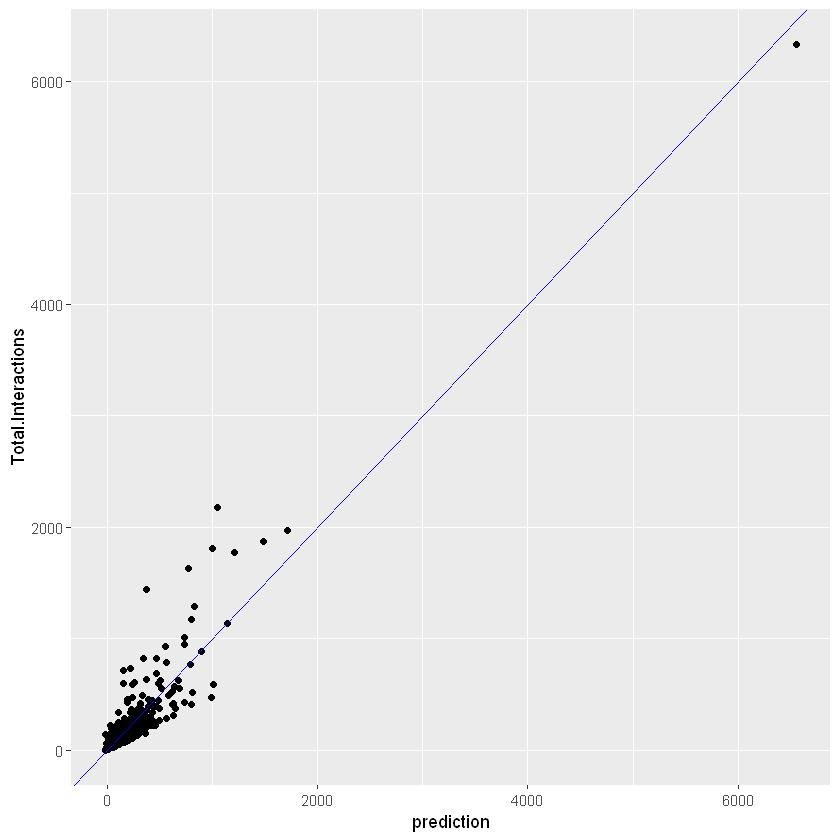

In [6]:
# visualizing the predicitons!
p1 <- ggplot(df, aes(x = prediction, y = Total.Interactions)) + geom_point();
p2 <- p1  + geom_abline(color = "blue")
p2

In [7]:
# Apply model to new data!
newshares <- data.frame(share = 400) # making a dataframe of one value 
newshares$prediction <- predict(mld1, newdata = newshares) # making a column of prediction
newshares # observing prediciton 

share,prediction
400,3311.052


# Multiple Linear Regression

In [8]:
# Now lets do multiple regression!
# instead of predicting total interactions with just share lets add some more variables
mdl2 <- lm(Total.Interactions ~ share + Lifetime.Engaged.Users + Lifetime.Post.Total.Reach + Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post, data = df)
mdl2
summary(mdl2)
glance(mdl2)

df$prediction_multivariate <- predict(mdl2)


Call:
lm(formula = Total.Interactions ~ share + Lifetime.Engaged.Users + 
    Lifetime.Post.Total.Reach + Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post, 
    data = df)

Coefficients:
                                                        (Intercept)  
                                                         -47.461795  
                                                              share  
                                                           7.547890  
                                             Lifetime.Engaged.Users  
                                                          -0.012332  
                                          Lifetime.Post.Total.Reach  
                                                           0.002226  
Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post  
                                                           0.058372  



Call:
lm(formula = Total.Interactions ~ share + Lifetime.Engaged.Users + 
    Lifetime.Post.Total.Reach + Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-516.66  -52.18    1.77   34.93  959.37 

Coefficients:
                                                                      Estimate
(Intercept)                                                         -4.746e+01
share                                                                7.548e+00
Lifetime.Engaged.Users                                              -1.233e-02
Lifetime.Post.Total.Reach                                            2.226e-03
Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post  5.837e-02
                                                                    Std. Error
(Intercept)                                                          8.511e+00
share                                                              

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8827637,0.8818067,131.2178,922.3986,1.807974e-226,5,-3113.907,6239.814,6265.041,8436881,490


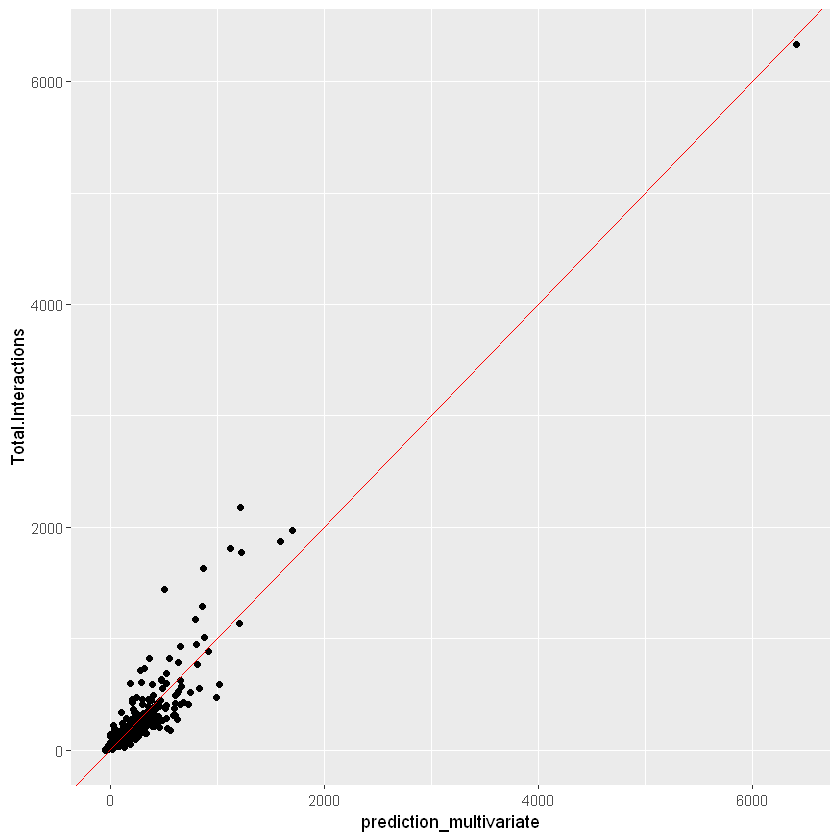

In [9]:
#lets plot our model 
p3 <-ggplot(df, aes(x = prediction_multivariate, y = Total.Interactions)) + geom_point();
p4 <-p3 + geom_abline(color = "red")
p4

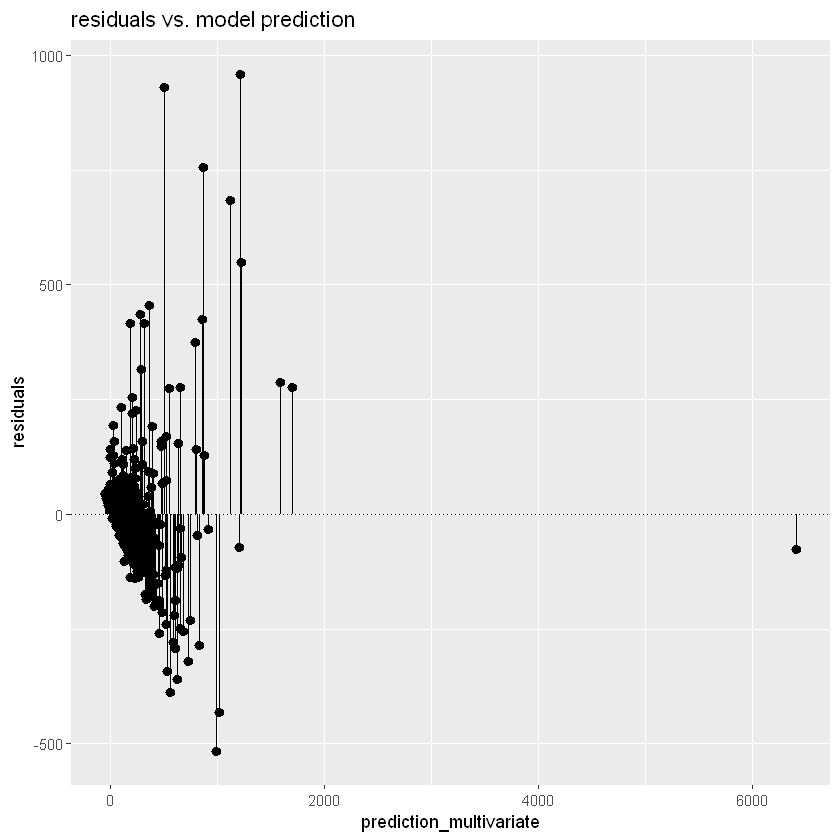

In [10]:
# Evaluating models Residuals 
# Calculate residuals
df$residuals <- df$Total.Interactions - df$prediction_multivariate

# Fill in the blanks to plot predictions (on x-axis) versus the residuals
ggplot(df, aes(x = prediction_multivariate, y = residuals)) + 
  geom_pointrange(aes(ymin = 0, ymax = residuals)) + 
  geom_hline(yintercept = 0, linetype = 3) + 
  ggtitle("residuals vs. model prediction")

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'WVPlots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpWUtd5n\downloaded_packages


Warning message:
"package 'WVPlots' was built under R version 3.6.2"

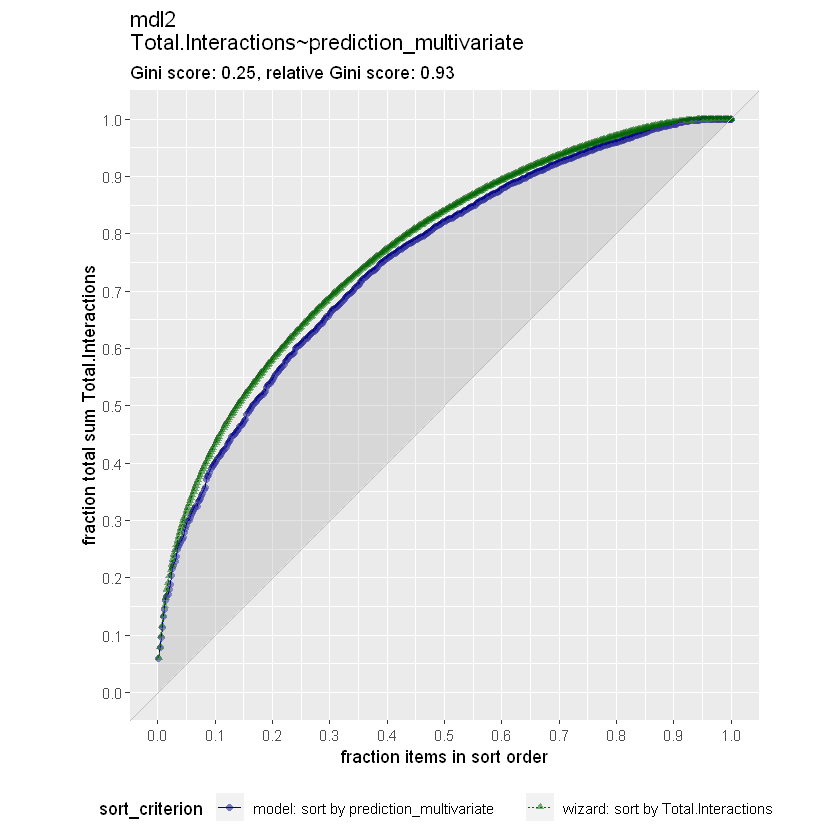

In [11]:
# Load the package WVPlots
install.packages("WVPlots")
library(WVPlots)

# Plot the Gain Curve
GainCurvePlot(df, "prediction_multivariate", "Total.Interactions", "mdl2")
# looks good!

In [15]:
# Checking the RMSE Root Mean Squared error 
error <- df$Total.Interactions - df$prediction_multivariate
error2 <- error^2
rmse <- sqrt(mean(error2)) # this is root mean squared error
rmse 

# lets compare it to the standard deviation of total interactions
sd <- sd(df$Total.Interactions)
sd # i guess the rmse is pretty good this model is better than estimating average

# Lets Check the R squared! Residual sum of squares (R2 = 1- RSS/SSTot)
error <- df$Total.Interactions - df$prediction_multivariate # error 
error2 <- error^2 # squared error 
RSS <- sum(error2) # this residual sum of squares 
RSS

totalerror <- df$Total.Interactions - mean(df$Total.Interactions) # total error
SSTot <- sum(totalerror^2) # Sum of squared total error 
SSTot

# Finally calculate the Rsquared!!!!!!!!!!
r_squared <- 1 - (RSS/SSTot) # the R squared is 88%
r_squared # looks good!

[1] 130.5534

[1] 381.6774

[1] 8436881

[1] 71964771

[1] 0.8827637

In [16]:
# side note
# For models that minimize squared error like linear regression 
# The R squared is the square of the correlation between the outcome and prediction
# only true for data model is trained on not new
# Correlation 
cor <- cor(df$prediction_multivariate, df$Total.Interactions)
cor^2 



[1] 0.8827637

# Training and CV

In [17]:
install.packages("vtreat")
library(vtreat)
install.packages("Metrics")
library(Metrics)
install.packages("rsq")
library(rsq)
install.packages("broom")
library(broom)

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'vtreat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpWUtd5n\downloaded_packages


Warning message:
"package 'vtreat' was built under R version 3.6.2"Loading required package: wrapr
Warning message:
"package 'wrapr' was built under R version 3.6.2"Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpWUtd5n\downloaded_packages


Warning message:
"package 'Metrics' was built under R version 3.6.2"Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rsq' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpWUtd5n\downloaded_packages


Warning message:
"package 'rsq' was built under R version 3.6.2"Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'broom' is in use and will not be installed"

In [18]:
# SAMPLING !!!!!!!!!!!!
(N <- nrow(df))

# Calculate how many rows 75% of N should be and print it
# Hint: use round() to get an integer
(target <- round(N * 0.75))

# Create the vector of N uniform random variables: gp
gp <- runif(N)

# Use gp to create the training set: df_train (75% of data) and df_test (25% of data)
df_train <- df[gp < 0.75, ]
df_test <- df[gp >= 0.75, ]

# Use nrow() to examine df_train and df_test
nrow(df_train)
nrow(df_test)


[1] 495

[1] 371

[1] 380

[1] 115

In [19]:
# First lets make our model a formula 
fmla <- as.formula("Total.Interactions ~ share + Lifetime.Engaged.Users + Lifetime.Post.Total.Reach + Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post")


In [20]:
# TRAIN A MODEL USING SAMPLED TRAINING DATASET
# Now use lm() to build a model df_model from df_train 
sample_train_model <- lm(fmla, data = df_train)

# Use summary() to examine the model
summary(sample_train_model)



Call:
lm(formula = fmla, data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-511.09  -49.81    2.84   36.99  905.23 

Coefficients:
                                                                      Estimate
(Intercept)                                                         -5.006e+01
share                                                                7.287e+00
Lifetime.Engaged.Users                                               1.716e-03
Lifetime.Post.Total.Reach                                            2.786e-03
Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post  4.545e-02
                                                                    Std. Error
(Intercept)                                                          9.856e+00
share                                                                2.120e-01
Lifetime.Engaged.Users                                               2.859e-02
Lifetime.Post.Total.Reach                                 

In [21]:
# predict interactions for the training set
df_train$pred_train <- predict(sample_train_model)

# predict from test set
df_test$pred_test<- predict(sample_train_model, newdata = df_test)

# Evaluate the rmse on both training and test data and print them
rmse_train <- rmse(df_train$pred_train, df_train$Total.Interactions)
rmse_train
rmse_test <- rmse(df_test$pred_test, df_test$Total.Interactions)
rmse_test


[1] 132.959

[1] 126.9791

In [23]:
# Evaluate the r-squared on both training 
error <- df_train$Total.Interactions - df_train$pred_train # error 
error2 <- error^2 # squared error 
RSS <- sum(error2) # this residual sum of squares
totalerror <- df_train$Total.Interactions - mean(df_train$Total.Interactions) # total error
SSTot <- sum(totalerror^2) # Sum of squared total error 
r_squared_train <- 1 - (RSS/SSTot) # the R squared is 88%
r_squared_train # .90

[1] 0.8966121

In [24]:
# Now calculate R sqared for test set prediction
error <- df_test$Total.Interactions - df_test$pred_test # error 
error2 <- error^2 # squared error 
RSS <- sum(error2) # this residual sum of squares
totalerror <- df_test$Total.Interactions - mean(df_test$Total.Interactions) # total error
SSTot <- sum(totalerror^2) # Sum of squared total error 
r_squared_test <- 1 - (RSS/SSTot) # the R squared is 88%
r_squared_test # 74%


[1] 0.7344604

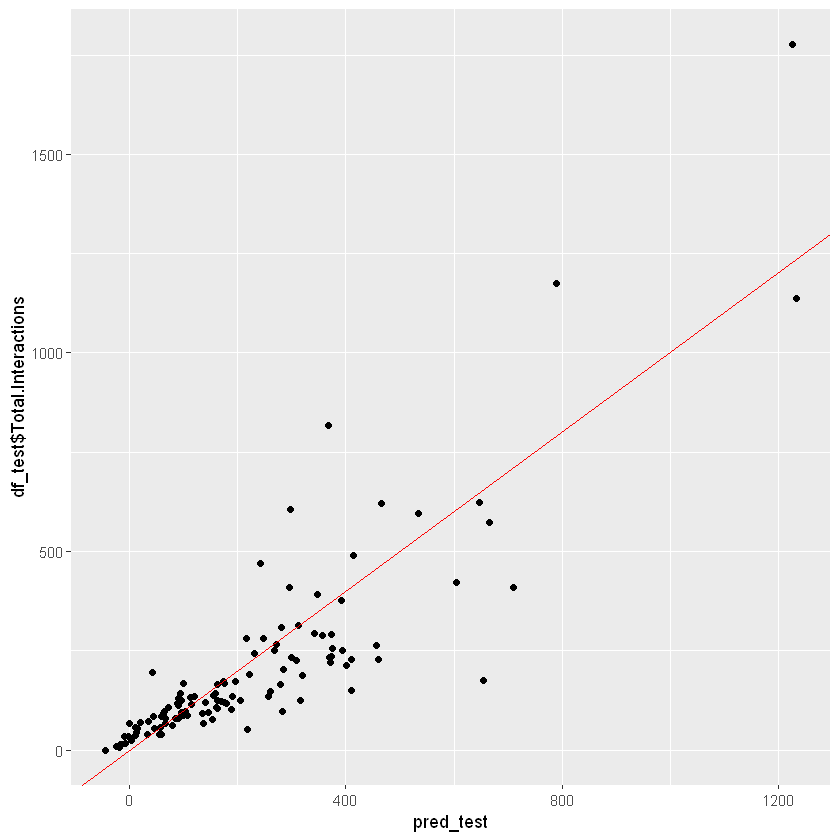

In [25]:
# Plot the predictions on the test data
ggplot(df_test, aes(x = pred_test, y = df_test$Total.Interactions)) + 
  geom_point() + 
  geom_abline(color = "red")



# Cross Validation

In [26]:
# CROSS VALIDATION !!!!!!!!!!!!
#using vtreat package
# the function works like this kWayCrossValidation(nRows,nSplits,NULL,NULL)
n <- nrow(df)
split_df <- kWayCrossValidation(n,3,NULL,NULL) # split into three folds (train,test,new prediciton)
split_df[[1]] #funciton returns indices for training and testing for each fold

split <- split_df[[i]] # assign the indices to split
model <- lm(fmla,data = df[split$train, ]) # make a model using the train indicies

df$pred.cv[split$app] <- predict(model, newdata = df[split$app,]) # test the model on the app and make new column in df


$train
  [1]   3   7  14  16  17  20  21  23  25  26  27  28  30  31  33  34  35  36
 [19]  37  39  40  42  43  44  45  47  49  50  51  54  55  56  57  58  59  60
 [37]  61  63  65  67  68  69  71  73  74  76  77  78  79  80  83  84  85  88
 [55]  89  92  94  95  96  99 100 101 104 106 107 113 115 116 118 119 120 123
 [73] 124 126 127 129 130 131 132 134 136 137 139 140 141 146 148 150 153 154
 [91] 155 156 157 158 162 163 164 165 168 171 172 174 175 176 178 179 180 182
[109] 183 184 185 186 187 188 189 190 192 195 197 198 199 202 204 205 208 210
[127] 213 214 215 216 217 220 223 224 225 226 230 231 232 234 235 236 237 238
[145] 239 241 242 243 244 245 246 247 248 254 256 258 259 260 262 263 264 266
[163] 267 268 270 271 272 273 274 275 276 277 278 279 281 282 283 285 286 288
[181] 291 292 293 295 296 297 298 299 300 301 302 304 305 306 307 308 309 311
[199] 315 316 319 321 322 324 325 326 327 329 334 335 337 338 339 340 341 343
[217] 344 346 347 348 349 350 352 353 354 355 356 357 359 360 361 364 365 366
[235] 368 369 371 372 373 374 375 378 379 381 383 385 387 388 389 390 391 392
[253] 394 396 398 399 400 402 403 405 406 407 410 411 412 413 415 417 418 419
[271] 420 421 422 424 426 427 428 429 430 431 433 434 435 436 437 439 440 441
[289] 442 443 444 445 446 447 448 450 452 453 454 455 456 457 459 460 462 463
[307] 464 465 466 467 468 469 473 474 476 477 480 481 482 483 484 485 486 487
[325] 488 490 491 492 493 494

$app
  [1] 330 253 351   5 461   4 438 233 255 103 397 211 209 449  19  22 472 323
 [19] 125  97   6 409 249  13 147 377 401 257 114 193 135 489 425 280 310 112
 [37]  82 495 294 251 404 451 416 207  93   9 169 144  70  64  66 393  11 133
 [55] 432 151 475 110 111 303 170  98 203 201 229   8  10 143  41 312 191  48
 [73] 145 479 313 250  87   1 227  15 138 289 328  81 121 384 362  86 314 471
 [91] 370 105  18 152  53  32 332 284 458 142 167 117   2 382  24 240 269 408
[109] 342 290 218 149 318 331  90 261 177 206 380 252  72 194 219  38 159 336
[127] 317 161 345 265  52  29 221  91 228 109 181 376 287 363 333 200 122 358
[145]  46  62 478 173 102 222 212 128 423 320 470 196 414  12 166 108 160  75
[163] 395 386 367

ERROR: Error in eval(expr, envir, enclos): object 'i' not found


In [27]:
# Run the 3-fold cross validation plan from splitPlan
# easier function method
k <- 3 # Number of folds
df$pred.cv <- 0 
for(i in 1:k) {
  split <- split_df[[i]]
  model <- lm(fmla, data = df[split$train, ])
  df$pred.cv[split$app] <- predict(model, newdata = df[split$app, ])
}


In [29]:
# Predict from a full model
df$pred <- predict(lm(fmla, data = df))

# Get the rmse of the full model's predictions
rmse(df$pred, df$Total.Interactions)

# Get the rmse of the cross-validation predictions
rmse(df$pred.cv, df$Total.Interactions)


[1] 130.5534

[1] 137.361

# One Hot Encoding (adding categorical variables)

In [30]:
# INTRODUCING CATEGORICAL VARIABLES 
# Here we will add Type column into our model
# One hot encoding
# here Type is the categorical variable 
fmla2 <- as.formula("Total.Interactions ~ share + Lifetime.Engaged.Users + Type")

# Use fmla2 and model.matrix to see how the data is represented for modeling
mmat <- model.matrix(fmla2, df)

# Examine the first 20 lines of df
head(df, n = 20)

# Examine the first 20 lines of mmat
head(mmat, n = 20)

Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,Lifetime.Post.Total.Reach,Lifetime.Post.Total.Impressions,Lifetime.Engaged.Users,...,Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post,comment,like,share,Total.Interactions,prediction,prediction_multivariate,residuals,pred.cv,pred
139441,Photo,2,12,4,3,0,2752,5091,178,...,119,4,79,17,100,128.67800,91.72823,8.271766,90.40075,91.72823
139441,Status,2,12,3,10,0,10460,19057,1457,...,1108,5,130,29,164,228.38685,241.41489,-77.414890,232.38796,241.41489
139441,Photo,3,12,3,3,0,2413,4373,177,...,132,0,66,14,80,103.75079,69.10128,10.898725,74.41310,69.10128
139441,Photo,2,12,2,10,1,50128,87991,2211,...,1386,58,1572,147,1777,1208.85724,1227.27797,549.722034,1182.45892,1227.27797
139441,Photo,2,12,2,3,0,7244,13594,671,...,396,19,325,49,393,394.56827,353.34728,39.652721,346.85251,353.34728
139441,Status,2,12,1,9,0,10472,20849,1191,...,1016,1,152,33,186,261.62314,269.54325,-83.543247,259.66571,269.54325
139441,Photo,3,12,1,3,1,11692,19479,481,...,379,3,249,27,279,211.76871,198.54369,80.456312,197.65038,198.54369
139441,Photo,3,12,7,9,1,13720,24137,537,...,422,0,325,14,339,103.75079,106.75393,232.246070,96.97166,106.75393
139441,Status,2,12,7,3,0,11844,22538,1530,...,1250,0,161,31,192,245.00499,266.97945,-74.979454,256.10728,266.97945
139441,Photo,3,12,6,10,0,4694,8668,280,...,199,3,113,26,142,203.45964,167.39317,-25.393167,163.92281,167.39317


(Intercept),share,Lifetime.Engaged.Users,TypePhoto,TypeStatus,TypeVideo
1,17,178,1,0,0
1,29,1457,0,1,0
1,14,177,1,0,0
1,147,2211,1,0,0
1,49,671,1,0,0
1,33,1191,0,1,0
1,27,481,1,0,0
1,14,537,1,0,0
1,31,1530,0,1,0
1,26,280,1,0,0


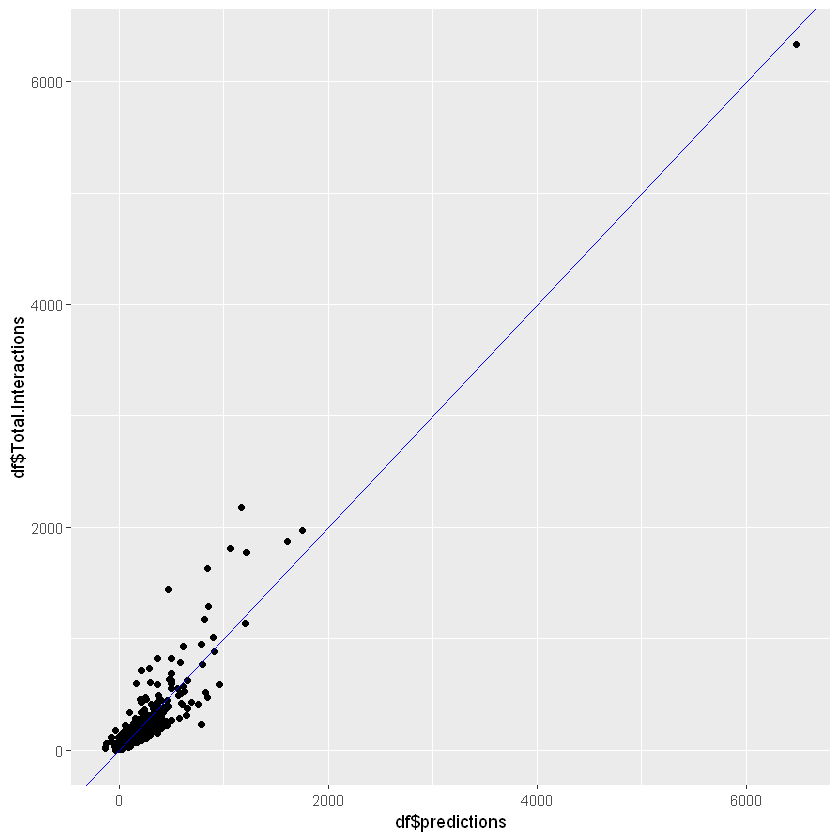

In [31]:
# Fit a model to predict df
Type_model <-  lm(fmla2, data = df)

# predict the number of Interactions
df$predictions <- predict(Type_model)

# Plot predictions vs actual (predictions on x-axis)
ggplot(df, aes(x = df$predictions, y = df$Total.Interactions)) + 
  geom_point() +
  geom_abline(color = "blue")

In [32]:
# ADDING INTERACTIONS !!!!!!!!!!!!!!!!!!!
#Formula with main affects only
flma_main <- as.formula("Total.Interactions ~ Type + like")

# Formula with interaction
flma_inter <- as.formula("Total.Interactions ~ like + Type:like")

#Fit the main effects only model
model_main <- lm(flma_main, data = df)

# Fit the interaction model
model_inter <- lm(flma_inter, data = df)

# Call summary on both models and compare
summary(model_main)
summary(model_inter)
# looks like interaction between like and type of video is significant


Call:
lm(formula = flma_main, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-174.071   -4.485   -0.053    6.626  260.907 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.992643   5.500922   0.544   0.5867    
TypePhoto   -0.224424   5.650338  -0.040   0.9683    
TypeStatus   6.647751   6.714797   0.990   0.3227    
TypeVideo   21.239117  11.198148   1.897   0.0585 .  
like         1.173690   0.003584 327.497   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.77 on 490 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9954 
F-statistic: 2.696e+04 on 4 and 490 DF,  p-value: < 2.2e-16



Call:
lm(formula = flma_inter, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-173.534   -4.569   -0.192    6.446  264.247 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.24265    1.35332   2.396   0.0169 *  
like             1.13600    0.04989  22.768   <2e-16 ***
like:TypePhoto   0.03695    0.04976   0.743   0.4581    
like:TypeStatus  0.06167    0.05208   1.184   0.2370    
like:TypeVideo   0.13449    0.06141   2.190   0.0290 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.72 on 490 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9955 
F-statistic: 2.708e+04 on 4 and 490 DF,  p-value: < 2.2e-16


# Logistic Regression to Predict Probabilities!

In [41]:
# LOGISTIC REGRESSSION TO PREDICT PROBABILITIES !!!!!!!!!!!!!!!!!!!
median(df$Total.Interactions) # make interactions a binary column 
df_train$Interaction.Level <- ifelse(df_train$Total.Interactions < 125, 0,1)

df_train <- na.omit(df_train)
df_test <- na.omit(df_test)

[1] 125

In [43]:
# Making Glm model 
glm_model <- glm(Interaction.Level ~ share + Lifetime.Engaged.Users + Lifetime.Post.Total.Reach + Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post, data = df_train, family = binomial)
glm_model

# Call glance
perf <- glance(glm_model)

# Calculate pseudo-R-squared
(pseudoR2 <- 1 - perf$deviance/perf$null.deviance)

# Predict new column using model getting probabilities 
df_train$glm_pred <- predict(glm_model, type = "response")
# probably not the best due to high outliers just doing it for reference

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:  glm(formula = Interaction.Level ~ share + Lifetime.Engaged.Users + 
    Lifetime.Post.Total.Reach + Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post, 
    family = binomial, data = df_train)

Coefficients:
                                                        (Intercept)  
                                                         -5.7728816  
                                                              share  
                                                          0.2449800  
                                             Lifetime.Engaged.Users  
                                                         -0.0011153  
                                          Lifetime.Post.Total.Reach  
                                                          0.0001103  
Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post  
                                                          0.0013716  

Degrees of Freedom: 379 Total (i.e. Null);  375 Residual
Null Devi

[1] 0.5975578

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'WVPlots' is in use and will not be installed"

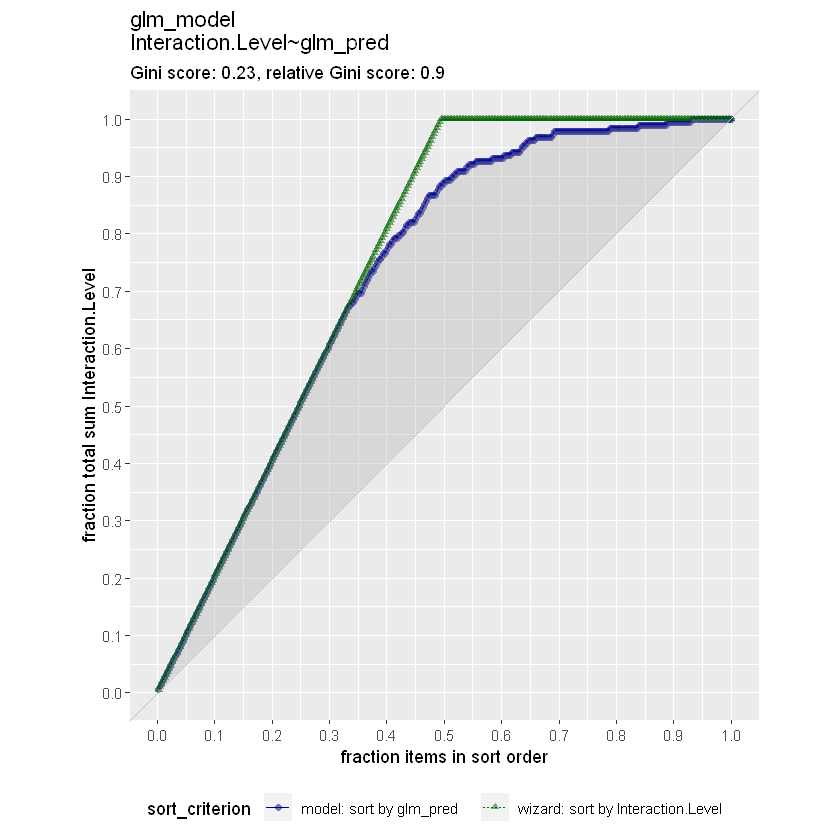

In [44]:
# Look at gain curve
install.packages("WVPlots")
library(WVPlots)
GainCurvePlot(df_train, "glm_pred", "Interaction.Level", "glm_model")


# Predict Count with QuassiPoisson!

In [45]:
# Poisson and quasipoisson regression to predict counts!!!!!!!!!!!!!!
# possion assumes mean(y) = var(y)
# if this is not true then quasiqossion might be answer
mean_interaction <- mean(df$Total.Interactions) # 213
var_interaction <- var(df$Total.Interactions) # 145677


In [54]:
# lets use quasipossion !!!!!!!!
quasi_model <- glm(Total.Interactions ~ share + Lifetime.Engaged.Users + Lifetime.Post.Total.Reach + Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post, data = df_train, family = quasipoisson)

#pseudo R square
output <- glance(quasi_model)
output
# Calculate pseudo-R-squared
(pseudoR2 <- 1 - output$deviance/output$null.deviance) # not great but it will do for now


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual
110621.8,379,NA,NA,NA,39253.42,375


[1] 0.6451567

In [56]:
# make prediction 
# Make predictions data
#This gives you actual number predictions
df_test$pred_quasi <- predict(quasi_model, newdata = df_test, type = "response")

head(df_test$pred_quasi)

[1] 120.2919 445.1069 148.7088 214.8155 123.3085 173.9639

In [59]:
 # Calculate the RMSE
  rmse(df_test$pred_quasi, df_test$Total.Interactions)

[1] 247.8316

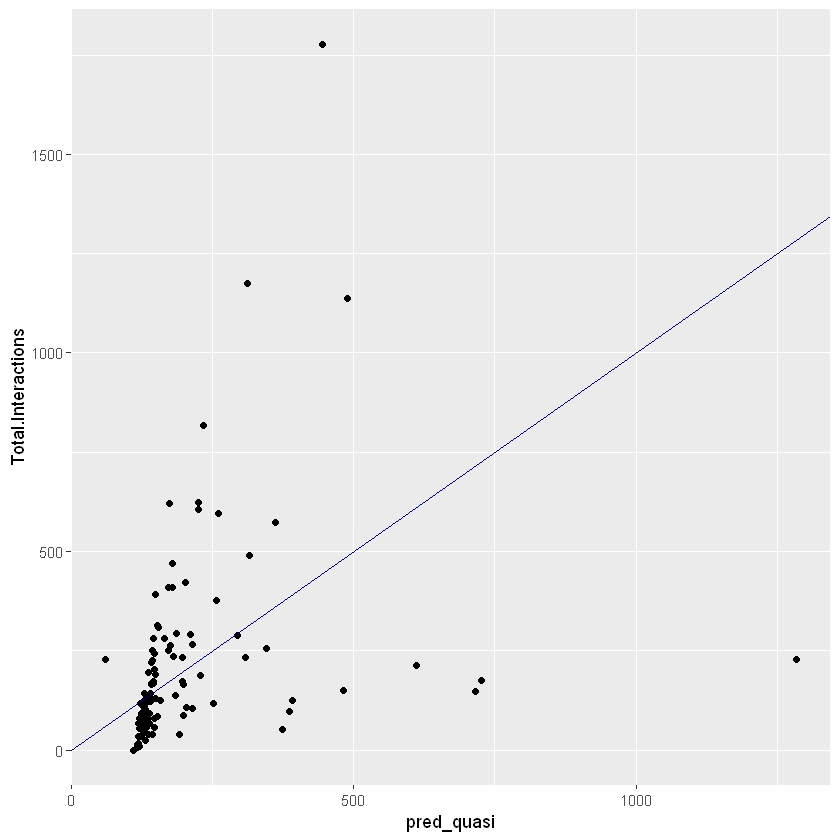

In [61]:
# Plot predictions vs Total.Interactions (pred on x-axis)
 ggplot(df_test, aes(x = pred_quasi, y = Total.Interactions)) +
   geom_point() + 
   geom_abline(color = "darkblue")

# GAM Non- Linear Models!

In [62]:
install.packages("mgcv")
library(mgcv)
require(tidyr) 
require(dplyr)

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'mgcv' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mgcv'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\blake\Documents\R\win-library\3.6\00LOCK\mgcv\libs\x64\mgcv.dll to C:\Users\blake\Documents\R\win-library\3.6\mgcv\libs\x64\mgcv.dll: Permission denied"Warning message:
"restored 'mgcv'"


The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpWUtd5n\downloaded_packages


Warning message:
"package 'mgcv' was built under R version 3.6.2"Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Attaching package: 'mgcv'

The following object is masked from 'package:wrapr':

    %.%

Loading required package: tidyr
Warning message:
"package 'tidyr' was built under R version 3.6.2"
Attaching package: 'tidyr'

The following object is masked from 'package:wrapr':

    unpack




Family: gaussian 
Link function: identity 

Formula:
Total.Interactions ~ s(comment)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  215.963      8.973   24.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
             edf Ref.df     F p-value    
s(comment) 8.152  8.717 200.7  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.822   Deviance explained = 82.5%
GCV =  31353  Scale est. = 30597     n = 380

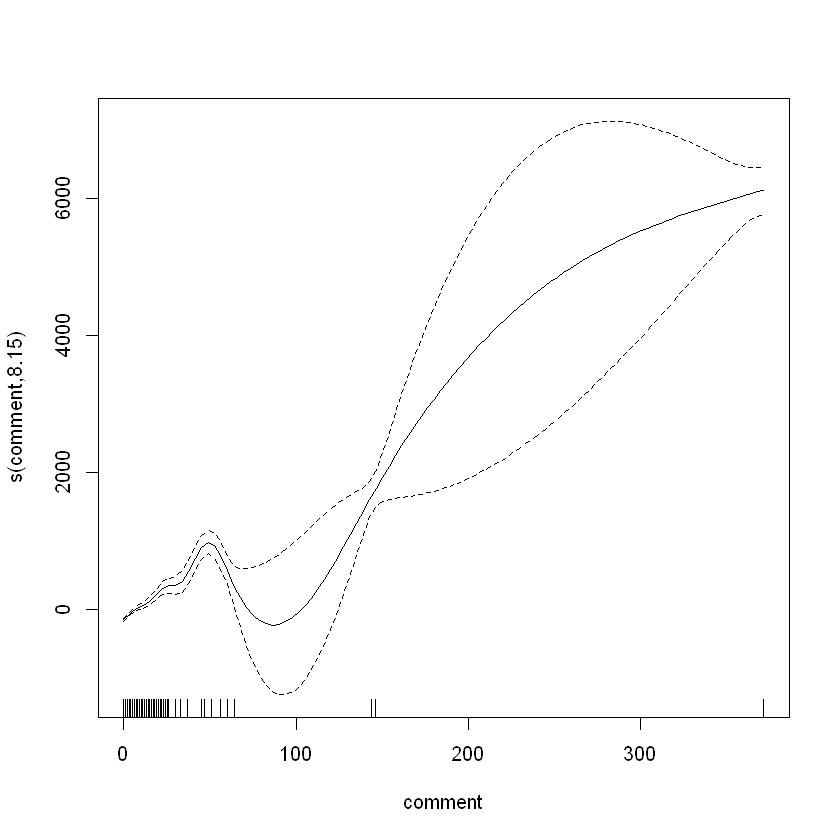

In [67]:
# GAM for non linear transformations!
# general addative model
# y= b0 + s1(x1) + s2(x2) s() function inside formulas to designate that you want to use a spline to model the non-linear relationship of a continuous variable to the outcome.
gam_model <- gam(Total.Interactions ~ s(comment), data = df_train, family = gaussian)
df_test$gam_pred <- predict(gam_model, newdata = df_test, type = "response")
summary(gam_model)
plot(gam_model)




Call:
lm(formula = Total.Interactions ~ comment, data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-666.19  -78.11  -26.41   27.81 1263.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  95.8593    10.0104   9.576   <2e-16 ***
comment      16.0364     0.4129  38.838   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.6 on 378 degrees of freedom
Multiple R-squared:  0.7996,	Adjusted R-squared:  0.7991 
F-statistic:  1508 on 1 and 378 DF,  p-value: < 2.2e-16


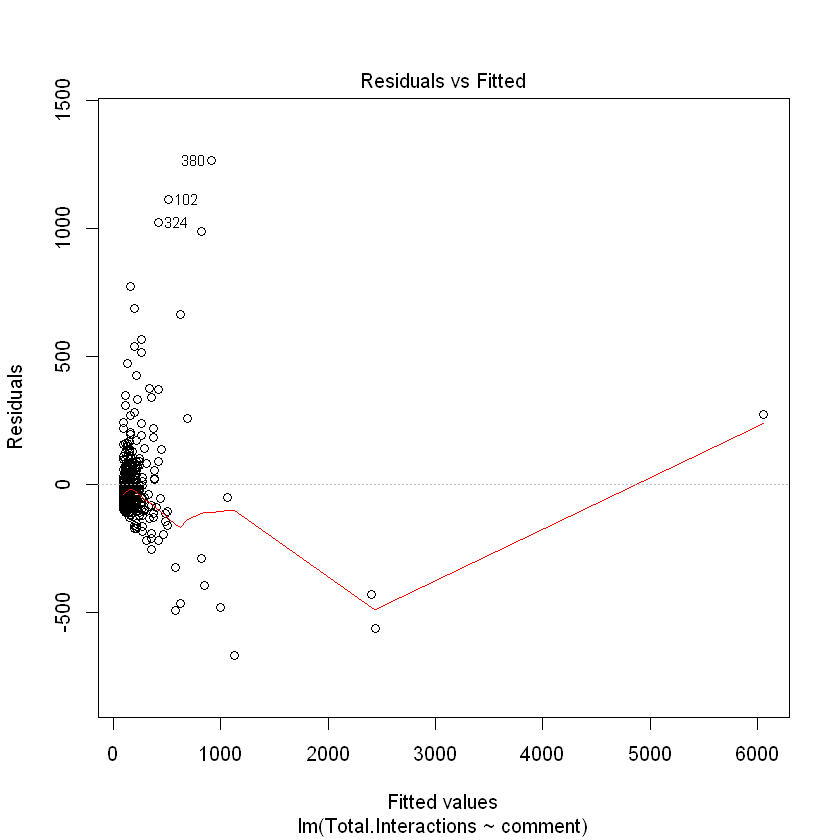

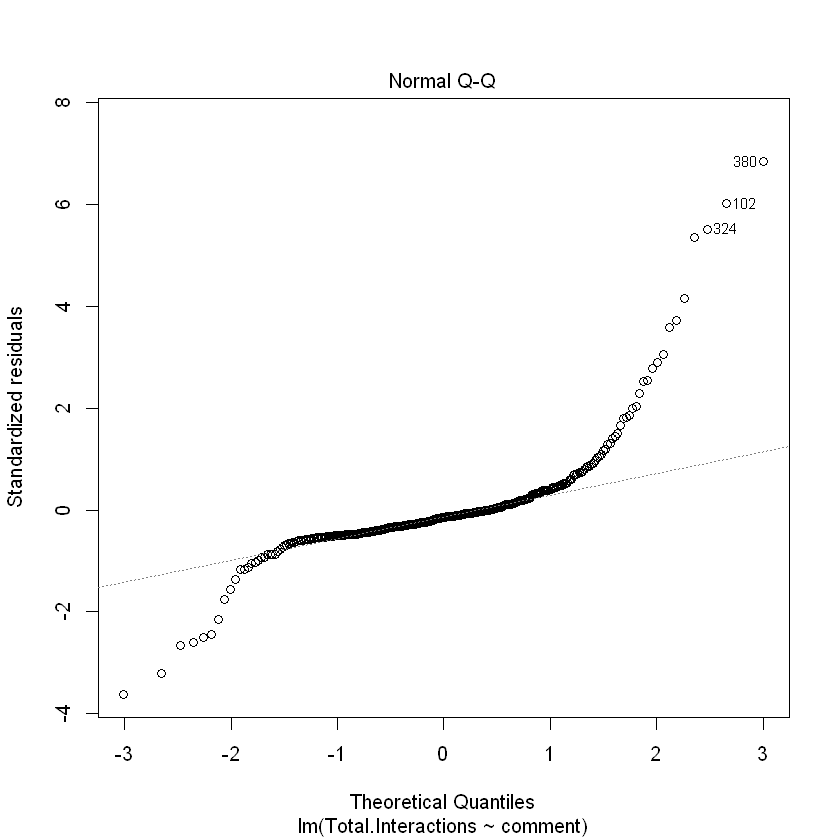

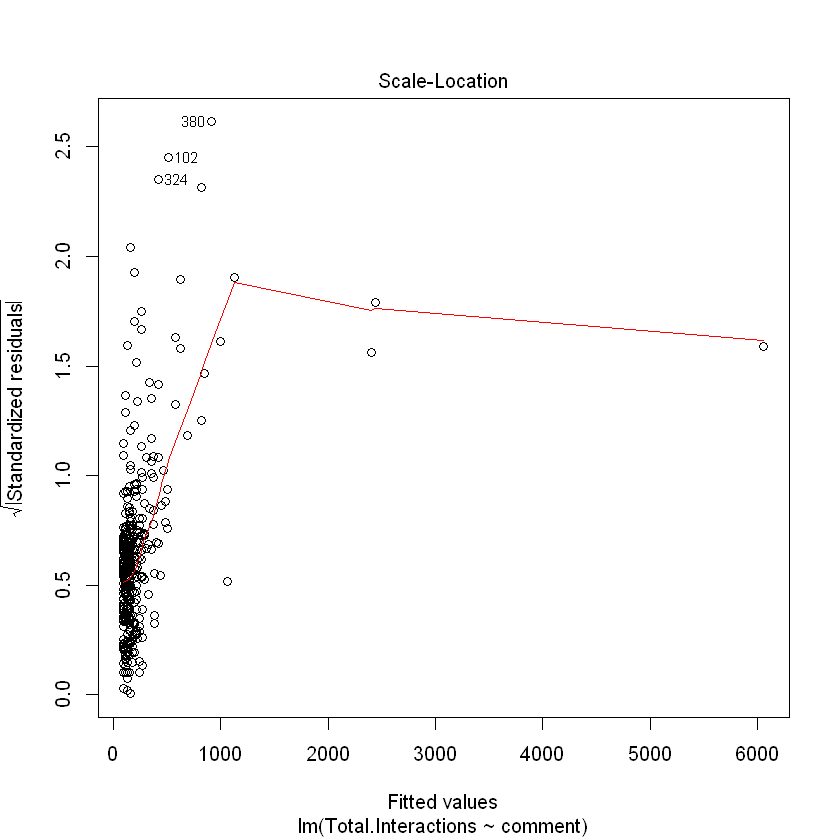

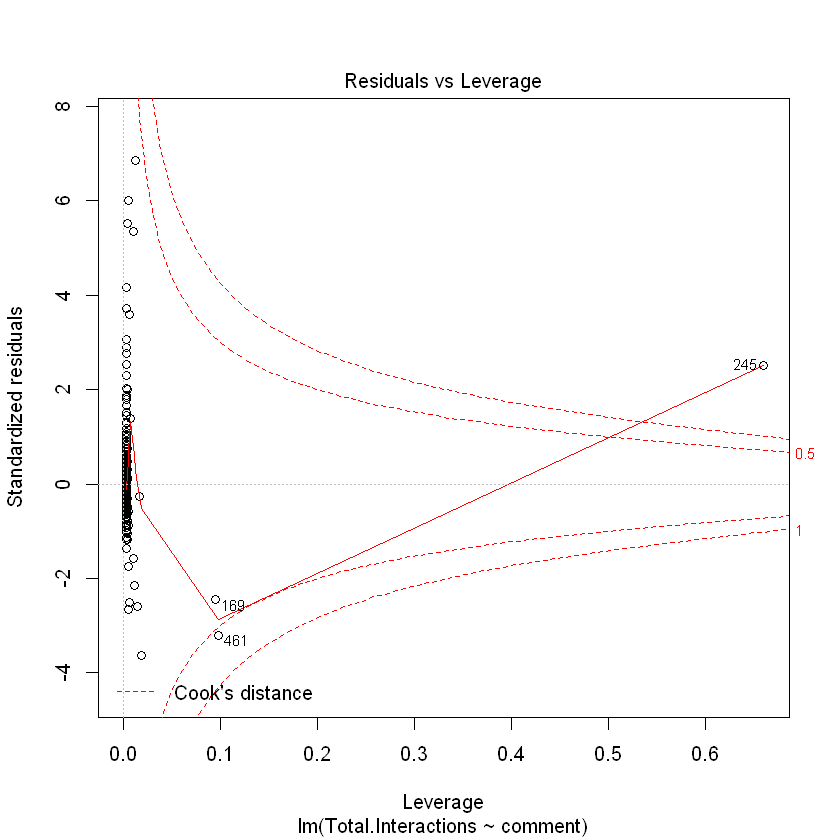

In [68]:
# VS Regular linear model
lm_model <- lm(Total.Interactions ~ comment, data = df_train)
summary(lm_model)
plot(lm_model)
df_test$lm_pred <- predict(lm_model, newdata = df_test)

In [69]:
# Gather the predictions into a "long" dataset
gam_long_df <- df_test %>%
  gather(key = modeltype, value = pred, lm_pred, gam_pred)

# Calculate the rmse
gam_long_df %>%
  mutate(residual = Total.Interactions - pred) %>%     # residuals
  group_by(modeltype) %>%                  # group by modeltype
  summarize(rmse = sqrt(mean(residual^2))) # calculate the RMSE

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

modeltype,rmse
gam_pred,199.7412
lm_pred,212.3039


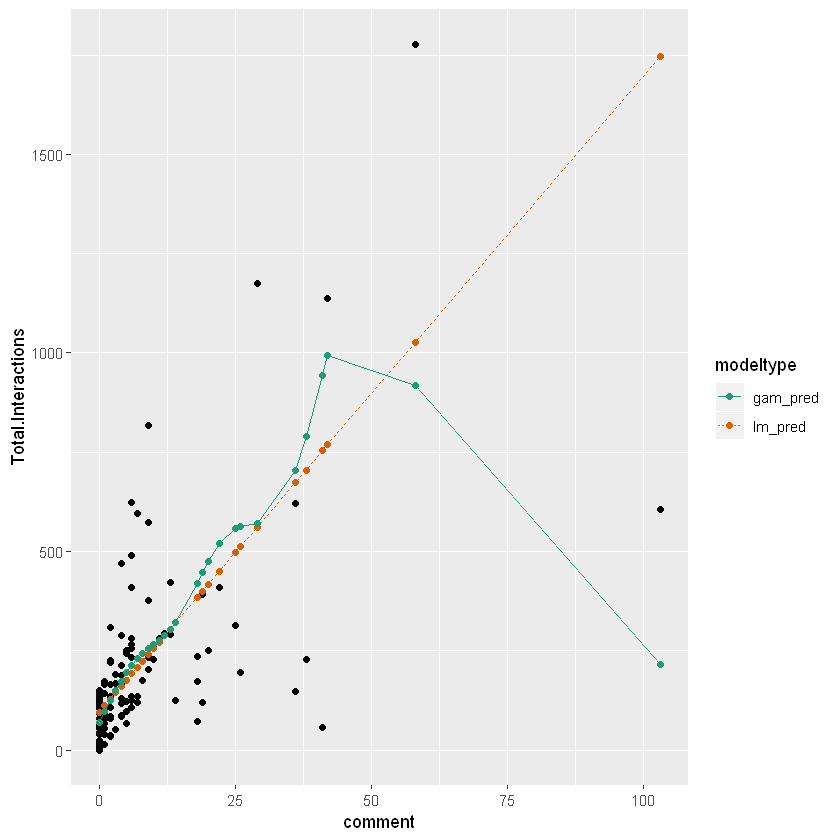

In [70]:
# Compare the predictions against actual on the test data
# in this case  an outlier drastically affected visual asthetic of this plot but we get the point
gam_long_df %>%
  ggplot(aes(x = comment)) +                          # the column for the x axis
  geom_point(aes(y = Total.Interactions)) +                    # the y-column for the scatterplot
  geom_point(aes(y = pred, color = modeltype)) +   # the y-column for the point-and-line plot
  geom_line(aes(y = pred, color = modeltype, linetype = modeltype)) + # the y-column for the point-and-line plot
  scale_color_brewer(palette = "Dark2")



# Tree Based Models!
# Random Forest 

In [73]:
# Load the package ranger
install.packages("ranger")
library(ranger)
require(ranger)
require(tidyr) 
require(dplyr)
require(ggplot2)

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ranger' is in use and will not be installed"

In [74]:
# TREE BASED MODELS 
# Random forest and gradient boosted trees
# RANDOM FOREST REGRESSION 

# Random seed to reproduce results
seed <-set.seed(345)

# the outcome column
(outcome <- "Total.Interactions")

# The input variables
(vars <- c("comment", "Lifetime.Post.Consumptions", "Lifetime.Engaged.Users", "Lifetime.Post.Total.Reach", "like", "share", "Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post"))

# Create the formula string for total interactions function of the inputs
(fmla <- paste(outcome, "~", paste(vars, collapse = " + ")))


[1] "Total.Interactions"

[1] "comment"                                                            
[2] "Lifetime.Post.Consumptions"                                         
[3] "Lifetime.Engaged.Users"                                             
[4] "Lifetime.Post.Total.Reach"                                          
[5] "like"                                                               
[6] "share"                                                              
[7] "Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post"

[1] "Total.Interactions ~ comment + Lifetime.Post.Consumptions + Lifetime.Engaged.Users + Lifetime.Post.Total.Reach + like + share + Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post"

In [75]:
# Fit and print the random forest model.
(Interaction_model_rf <- ranger(fmla, 
                         df_train, 
                         num.trees = 500, 
                         respect.unordered.factors = "order", 
                         seed = seed))

# Make predictions on the test data
df_test$rf_pred <- predict(Interaction_model_rf, df_test)$predictions

Ranger result

Call:
 ranger(fmla, df_train, num.trees = 500, respect.unordered.factors = "order",      seed = seed) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      380 
Number of independent variables:  7 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       56354.92 
R squared (OOB):                  0.6712831 

In [76]:
# Calculate the RMSE of the predictions
df_test %>% 
  mutate(residual = Total.Interactions - rf_pred)  %>%        # calculate the residual
  summarize(rmse  = sqrt(mean(residual^2))) # calculate rmse

rmse
106.0238


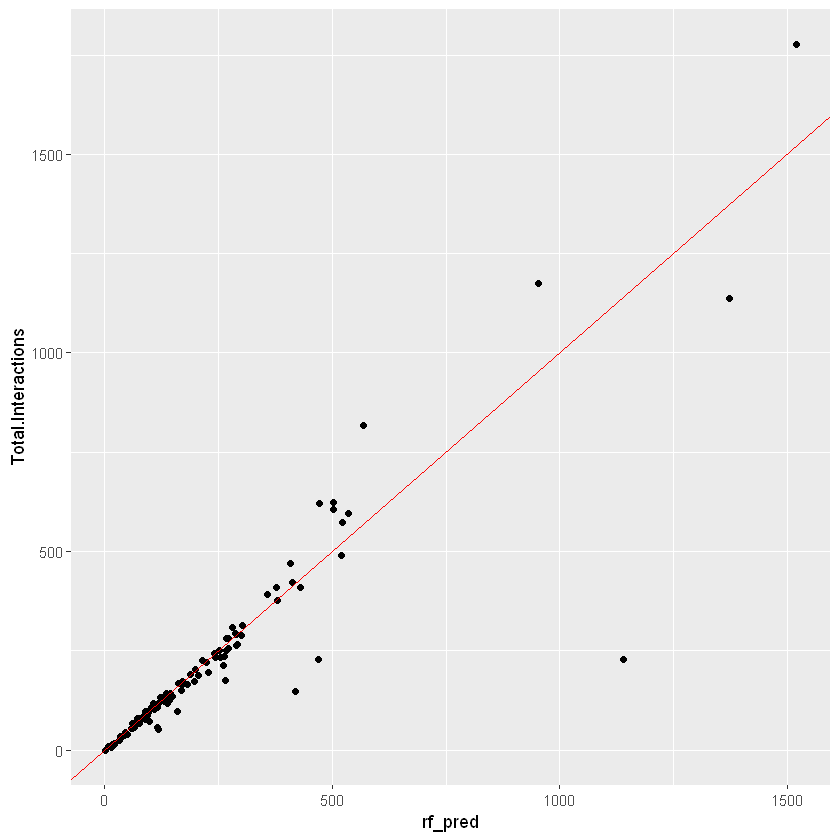

In [77]:
# Plot actual outcome vs predictions (predictions on x-axis)
ggplot(df_test, aes(x = rf_pred, y = Total.Interactions)) + 
  geom_point() + 
  geom_abline(color = "red")

# XGBOOST 

# AND ADDING CATEGORICAL USING ONE HOT ENCODING

In [78]:
# XGBOOST AND ADDING CATEGORICAL USING ONE HOT ENCODING
require(vtreat)
require(magrittr)

Loading required package: magrittr

Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract



In [79]:
# Getting rid of all the other prediction columns we previously created
df_train_xg <- df_train[,c(2,3,7:19)]
head(df_train_xg)
df_test_xg <- df_test[,c(2,3,7:19)]
head(df_test_xg)

,Type,Category,Paid,Lifetime.Post.Total.Reach,Lifetime.Post.Total.Impressions,Lifetime.Engaged.Users,Lifetime.Post.Consumers,Lifetime.Post.Consumptions,Lifetime.Post.Impressions.by.people.who.have.liked.your.Page,Lifetime.Post.reach.by.people.who.like.your.Page,Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post,comment,like,share,Total.Interactions
1,Photo,2,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
2,Status,2,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
6,Status,2,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186
7,Photo,3,1,11692,19479,481,265,364,15432,9328,379,3,249,27,279
8,Photo,3,1,13720,24137,537,232,305,19728,11056,422,0,325,14,339
9,Status,2,0,11844,22538,1530,1407,1692,15220,7912,1250,0,161,31,192


,Type,Category,Paid,Lifetime.Post.Total.Reach,Lifetime.Post.Total.Impressions,Lifetime.Engaged.Users,Lifetime.Post.Consumers,Lifetime.Post.Consumptions,Lifetime.Post.Impressions.by.people.who.have.liked.your.Page,Lifetime.Post.reach.by.people.who.like.your.Page,Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post,comment,like,share,Total.Interactions
3,Photo,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
4,Photo,2,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
5,Photo,2,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
26,Status,2,0,8284,15104,1521,1462,1711,10266,5372,1200,0,88,18,106
28,Photo,3,0,2478,4306,212,124,149,2612,1443,166,0,100,17,117
29,Photo,2,0,9560,18264,973,559,885,9217,4748,621,36,523,63,622


In [80]:
df_train_xg$Category <- as.factor(df_train_xg$Category)
df_test_xg$Category <- as.factor(df_test_xg$Category)
# Create a vector of variable names
(vars <- c("Category", "Type","Paid","Lifetime.Post.Total.Reach","Lifetime.Post.Total.Impressions"
           ,"Lifetime.Engaged.Users","Lifetime.Post.Consumers","Lifetime.Post.Consumptions"
           ,"Lifetime.Post.Impressions.by.people.who.have.liked.your.Page","Lifetime.Post.reach.by.people.who.like.your.Page",
           "Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post","comment","like","share"))


[1] "Category"                                                           
 [2] "Type"                                                               
 [3] "Paid"                                                               
 [4] "Lifetime.Post.Total.Reach"                                          
 [5] "Lifetime.Post.Total.Impressions"                                    
 [6] "Lifetime.Engaged.Users"                                             
 [7] "Lifetime.Post.Consumers"                                            
 [8] "Lifetime.Post.Consumptions"                                         
 [9] "Lifetime.Post.Impressions.by.people.who.have.liked.your.Page"       
[10] "Lifetime.Post.reach.by.people.who.like.your.Page"                   
[11] "Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post"
[12] "comment"                                                            
[13] "like"                                                               
[14] "share"

In [81]:
# Create the treatment plan
treatplan <- designTreatmentsZ(df_train_xg, vars)

# Examine the scoreFrame
(scoreFrame <- treatplan %>%
    use_series(scoreFrame) %>%
    select(varName, origName, code))

# We only want the rows with codes "clean" or "lev"
(newvars <- scoreFrame %>%
    filter(code %in% c("clean", "lev")) %>%
    use_series(varName))


[1] "vtreat 1.5.2 inspecting inputs Thu Feb 27 09:53:16 2020"
[1] "designing treatments Thu Feb 27 09:53:16 2020"
[1] " have initial level statistics Thu Feb 27 09:53:16 2020"
[1] " scoring treatments Thu Feb 27 09:53:16 2020"
[1] "have treatment plan Thu Feb 27 09:53:16 2020"


varName,origName,code
Category_catP,Category,catP
Type_catP,Type,catP
Paid,Paid,clean
Lifetime_Post_Total_Reach,Lifetime.Post.Total.Reach,clean
Lifetime_Post_Total_Impressions,Lifetime.Post.Total.Impressions,clean
Lifetime_Engaged_Users,Lifetime.Engaged.Users,clean
Lifetime_Post_Consumers,Lifetime.Post.Consumers,clean
Lifetime_Post_Consumptions,Lifetime.Post.Consumptions,clean
Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime.Post.Impressions.by.people.who.have.liked.your.Page,clean
Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime.Post.reach.by.people.who.like.your.Page,clean


[1] "Paid"                                                               
 [2] "Lifetime_Post_Total_Reach"                                          
 [3] "Lifetime_Post_Total_Impressions"                                    
 [4] "Lifetime_Engaged_Users"                                             
 [5] "Lifetime_Post_Consumers"                                            
 [6] "Lifetime_Post_Consumptions"                                         
 [7] "Lifetime_Post_Impressions_by_people_who_have_liked_your_Page"       
 [8] "Lifetime_Post_reach_by_people_who_like_your_Page"                   
 [9] "Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post"
[10] "comment"                                                            
[11] "like"                                                               
[12] "share"                                                              
[13] "Category_lev_x_1"                                                   
[14] "Category_lev_x_2"                                                   
[15] "Category_lev_x_3"                                                   
[16] "Type_lev_x_Link"                                                    
[17] "Type_lev_x_Photo"                                                   
[18] "Type_lev_x_Status"                                                  
[19] "Type_lev_x_Video"

In [86]:
# Create the treated training data
(df_train_xg.treat <- prepare(treatplan, df_train_xg, varRestriction = newvars))

# treatplan is in the workspace
summary(treatplan)

# newvars is in the workspace
head(newvars)

# Print train and test dataframe
head(df_train_xg)
head(df_test_xg)

# Use prepare() to one-hot-encode test dataframe
(df_test_xg.treat <- prepare(treatplan, df_test_xg, varRestriction = newvars))


Paid,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Category_lev_x_1,Category_lev_x_2,Category_lev_x_3,Type_lev_x_Link,Type_lev_x_Photo,Type_lev_x_Status,Type_lev_x_Video
0,2752,5091,178,109,159,3078,1640,119,4,79,17,0,1,0,0,1,0,0
0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,0,1,0,0,0,1,0
0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,0,1,0,0,0,1,0
1,11692,19479,481,265,364,15432,9328,379,3,249,27,0,0,1,0,1,0,0
1,13720,24137,537,232,305,19728,11056,422,0,325,14,0,0,1,0,1,0,0
0,11844,22538,1530,1407,1692,15220,7912,1250,0,161,31,0,1,0,0,0,1,0
0,4694,8668,280,183,250,4309,2324,199,3,113,26,0,0,1,0,1,0,0
0,21744,42334,4258,4100,4540,37849,18952,3798,0,233,19,0,1,0,0,0,1,0
0,3112,5590,208,127,145,3887,2174,165,0,88,18,0,1,0,0,1,0,0
0,2847,5133,193,115,133,3779,2072,152,0,90,14,0,1,0,0,1,0,0


              Length Class           Mode     
treatments    16     -none-          list     
scoreFrame     8     data.frame      list     
outcomename    1     -none-          character
vtreatVersion  1     package_version list     
outcomeType    1     -none-          character
outcomeTarget  1     -none-          character
meanY          1     -none-          logical  
splitmethod    1     -none-          character

[1] "Paid"                            "Lifetime_Post_Total_Reach"      
[3] "Lifetime_Post_Total_Impressions" "Lifetime_Engaged_Users"         
[5] "Lifetime_Post_Consumers"         "Lifetime_Post_Consumptions"

,Type,Category,Paid,Lifetime.Post.Total.Reach,Lifetime.Post.Total.Impressions,Lifetime.Engaged.Users,Lifetime.Post.Consumers,Lifetime.Post.Consumptions,Lifetime.Post.Impressions.by.people.who.have.liked.your.Page,Lifetime.Post.reach.by.people.who.like.your.Page,Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post,comment,like,share,Total.Interactions
1,Photo,2,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
2,Status,2,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
6,Status,2,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186
7,Photo,3,1,11692,19479,481,265,364,15432,9328,379,3,249,27,279
8,Photo,3,1,13720,24137,537,232,305,19728,11056,422,0,325,14,339
9,Status,2,0,11844,22538,1530,1407,1692,15220,7912,1250,0,161,31,192


,Type,Category,Paid,Lifetime.Post.Total.Reach,Lifetime.Post.Total.Impressions,Lifetime.Engaged.Users,Lifetime.Post.Consumers,Lifetime.Post.Consumptions,Lifetime.Post.Impressions.by.people.who.have.liked.your.Page,Lifetime.Post.reach.by.people.who.like.your.Page,Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post,comment,like,share,Total.Interactions
3,Photo,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
4,Photo,2,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
5,Photo,2,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
26,Status,2,0,8284,15104,1521,1462,1711,10266,5372,1200,0,88,18,106
28,Photo,3,0,2478,4306,212,124,149,2612,1443,166,0,100,17,117
29,Photo,2,0,9560,18264,973,559,885,9217,4748,621,36,523,63,622


Paid,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Category_lev_x_1,Category_lev_x_2,Category_lev_x_3,Type_lev_x_Link,Type_lev_x_Photo,Type_lev_x_Status,Type_lev_x_Video
0,2413,4373,177,113,154,2812,1503,132,0,66,14,0,0,1,0,1,0,0
1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,0,1,0,0,1,0,0
0,7244,13594,671,410,580,6228,3200,396,19,325,49,0,1,0,0,1,0,0
0,8284,15104,1521,1462,1711,10266,5372,1200,0,88,18,0,1,0,0,0,1,0
0,2478,4306,212,124,149,2612,1443,166,0,100,17,0,0,1,0,1,0,0
0,9560,18264,973,559,885,9217,4748,621,36,523,63,0,1,0,0,1,0,0
1,36208,61262,1141,1068,1728,30131,14112,559,18,143,13,1,0,0,0,0,0,1
0,2690,4628,252,168,226,3052,1727,199,0,96,17,0,0,1,0,1,0,0
0,4284,8387,355,316,513,7283,3634,291,0,47,11,1,0,0,0,1,0,0
0,16576,30612,3572,3464,4802,24363,12888,3014,4,174,36,1,0,0,0,0,1,0


# Gradient Boosting Machine (XGBOOST)

In [87]:
# Load the package xgboost
require(xgboost)
install.packages("xgboost")
library(xgboost)

Loading required package: xgboost
Warning message:
"package 'xgboost' was built under R version 3.6.2"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'xgboost' is in use and will not be installed"

In [91]:
# GRADIENT BOOSTING MACHINE
# start model by one shallow tree
# next fit a tree to the residuals of model and find weighted sum of that tree first one gives best fit
# for regularized boosting decrease learning by a factor eta between 0 and 1
# 1 for faster learning and 0 slower faster could be more overfit
# repeat until small error or max iterations
# lowest out of sample error is best
# Run xgb.cv
cv <- xgb.cv(data = as.matrix(df_train_xg.treat), 
             label = df_train_xg$Total.Interactions,
             nrounds = 100,
             nfold = 5,
             objective = "reg:linear",
             eta = 0.3,
             max_depth = 6,
             early_stopping_rounds = 10,
             verbose = 0   # silent
)

# Get the evaluation log
elog <- cv$evaluation_log

In [90]:
# Determine and print how many trees minimize training and test error
elog %>% 
  summarize(ntrees.train = which.min(train_rmse_mean),   # find the index of min(train_rmse_mean)
            ntrees.test  = which.min(test_rmse_mean))    # find the index of min(test_rmse_mean)


ntrees.train,ntrees.test
19,9


In [92]:
# The number of trees to use, as determined by xgb.cv
ntrees <- 9

# Run xgboost
Interaction_model_xgb <- xgboost(data = as.matrix(df_train_xg.treat), # training data as matrix
                          label = df_train_xg$Total.Interactions,  # column of outcomes
                          nrounds = ntrees,       # number of trees to build
                          objective = "reg:linear", # objective
                          eta = 0.3,
                          depth = 6,
                          verbose = 0  # silent
)

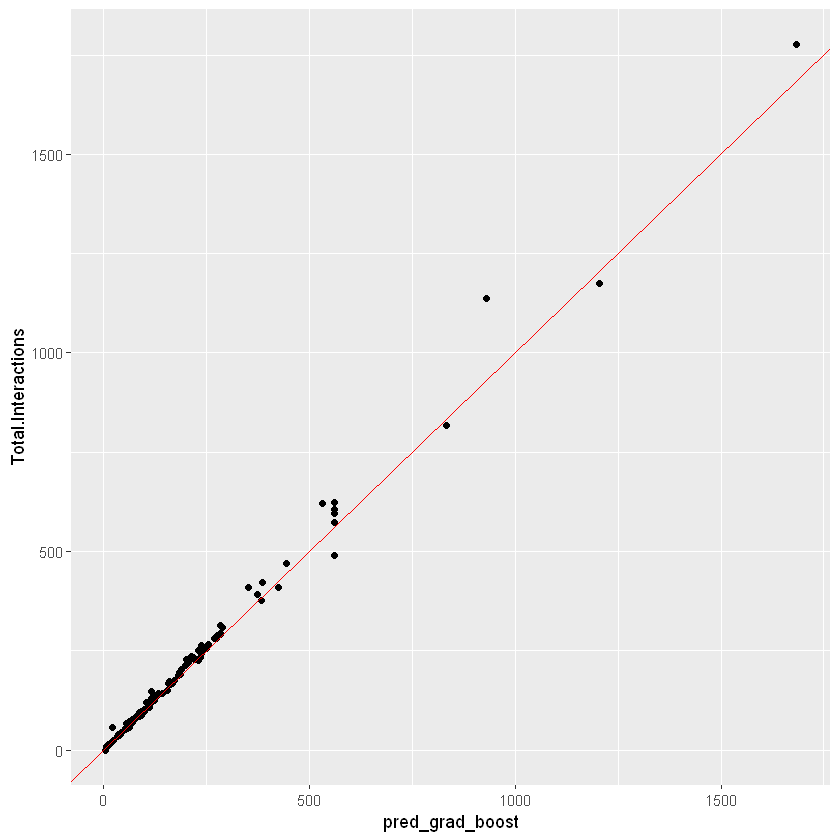

In [93]:
# Make predictions
df_test_xg$pred_grad_boost <- predict(Interaction_model_xgb, as.matrix(df_test_xg.treat))

# Plot predictions vs actual bike rental count
ggplot(df_test_xg, aes(x = pred_grad_boost, y = Total.Interactions)) + 
  geom_point() + 
  geom_abline(color="red")

In [94]:
# Calculate RMSE
df_test_xg %>%
  mutate(residuals = Total.Interactions - pred_grad_boost) %>%
  summarize(rmse = sqrt(mean(residuals^2)))


rmse
27.94698


# XGBOOST IS GREAT!
